# Exploratory notebook

    @Josefina Dalla Via

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

##### Import requested packages

In [1]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt 
import thesis_lib

pd.set_option('display.max_columns', None)  
from thesis_lib.data_processing import *
from thesis_lib.visual import *
import warnings
warnings.filterwarnings('ignore')

### Read data from csv

In [2]:
db = load_parquet('parquet_data')

Loading dataset:  laboratory
	 3086085
Loading dataset:  images
	 350403
Loading dataset:  hospitalizations
	 88256
Loading dataset:  surgeries
	 66750
Loading dataset:  sectors_admissions
	 154481
Loading dataset:  hospital_sectors
	 36
Formating integer columns
Formating date columns
Formating time columns


In [3]:
print('Available data:')
for i,table in enumerate(db.keys()):
    print(i+1,table)
    #print(db[table].columns)
    #print(db[table].info())
    

Available data:
1 laboratory
2 images
3 hospitalizations
4 surgeries
5 sectors_admissions
6 hospital_sectors


## 1) Hospital Sectors

This dataset contains information of the different Sectors in which the hospital is organized. 

Total no. of sectors is 36. 

Each sector has a code consisting of 3 characters which identifies it. 

Sectores are grouped into 16 'Sector Types'. A list of the different Sector types is presented below

##### Sample view of the sectors df 

In [4]:
sectors = db['hospital_sectors']

In [6]:
sectors.head()

,sector_code,sector_name,sector_type
0,ACV,UNIDAD DE ACV,Unidad de ACV
1,CEG,CUIDADOS ESPEC. EN OBSERVACION,Cuidados especiales Guardia
2,CO3,CORDOBA 3 (INT.GRAL),CORDOBA - Internacion General
3,CO4,CORDOBA 4 (INT.GRAL),CORDOBA - Internacion General
4,CO5,CORDOBA 5 (INT.GRAL),CORDOBA - Internacion General


##### No. of sectors: 

In [7]:
print(str(len(sectors.sector_code.unique())))

36


##### List of Existing sectors and its codes

In [8]:
sectors[['sector_name','sector_code']]

,sector_name,sector_code
0,UNIDAD DE ACV,ACV
1,CUIDADOS ESPEC. EN OBSERVACION,CEG
2,CORDOBA 3 (INT.GRAL),CO3
3,CORDOBA 4 (INT.GRAL),CO4
4,CORDOBA 5 (INT.GRAL),CO5
5,CORDOBA 6 (INT.GRAL),CO6
6,CORDOBA 7 (INT. GRAL),CO7
7,CORDOBA 8 (INT. GRAL),CO8
8,EMERGENCIAS - CEG,EME
9,HEMOTERAPIA 4 SS TORRE,H10


##### No. of Sector Types

In [9]:
len(sectors.sector_type.unique())

16

##### Number of Sectors grouped by Sector Type

In [10]:
sectors.groupby('sector_type')['sector_name'].count()

sector_type
(No Agrupado)                       1
CORDOBA - Internacion General       6
Cuidados especiales Guardia         1
Emergencias                         1
Hemoterapia                         1
Internacion Conjunta                1
Internacion Quirurgica Breve        1
Neonatologia                        1
Pediatria                           1
Pre-Partos                          1
TORRE - Internacion general        11
Terapia intensiva                   4
Terapia pediatrica                  2
Unidad Paciente Critico Cronico     1
Unidad coronaria                    2
Unidad de ACV                       1
Name: sector_name, dtype: int64

##### Sectors Structure

In [11]:
sectors_groups = sectors.groupby(by=['sector_type','sector_name']).describe()['sector_code']['top']
pd.DataFrame(sectors_groups)

top
sector_type                     sector_name                        
(No Agrupado)                   PLANTA QUIRURGICA               PQU
CORDOBA - Internacion General   CORDOBA 3 (INT.GRAL)            CO3
                                CORDOBA 4 (INT.GRAL)            CO4
                                CORDOBA 5 (INT.GRAL)            CO5
                                CORDOBA 6 (INT.GRAL)            CO6
                                CORDOBA 7 (INT. GRAL)           CO7
                                CORDOBA 8  (INT. GRAL)          CO8
Cuidados especiales Guardia     CUIDADOS ESPEC. EN OBSERVACION  CEG
Emergencias                     EMERGENCIAS - CEG               EME
Hemoterapia                     HEMOTERAPIA 4 SS TORRE          H10
Internacion Conjunta            INTERNACION CONJUNTA            NUR
Internacion Quirurgica Breve    INT. QUIRURGICA BREVE           IQB
Neonatologia                    TORRE 6 (NEONATOL)              NNT
Pediatria                       TORRE 9 (PED)                   PED
Pre-Partos                      PREPARTO                        PRP
TORRE - Internacion general     TORRE 10 (INT.GRAL)             T10
                                TORRE 11 (INT.GRAL)             T11
                                TORRE 12 (INT.GRAL)             T12
                                TORRE 13 (INT. GRAL.)           T13
                                TORRE 14 (INT.GRAL.)            T14
                                TORRE 15 (INT.GRAL)             T15
                                TORRE 16 (INT.GRAL.-ONCOHEMAT)  T16
                                TORRE 17 (INT.GRAL)             T17
                                TORRE 18 (INT.GRAL)             T18
                                TORRE 19 (INT.GRAL)             T19
                                TORRE 9                         T09
Terapia intensiva               CUIDADOS INTENSIVOS I SECTOR1   UC1
                                CUIDADOS INTENSIVOS I SECTOR2   UC2
                                CUIDADOS INTENSIVOS I SECTOR3   UC3
                                CUIDADOS INTENSIVOS I SECTOR4   UC4
Terapia pediatrica              TORRE 8 (TER. PED)              TEP
                                TORRE 8 (TER.INTERM.PED)        TIP
Unidad Paciente Critico Cronico UNIDAD PACIENTE CRITICO CRONIC  UCR
Unidad coronaria                UNIDAD CORONARIA I              UC6
                                UNIDAD CORONARIA II             UCO
Unidad de ACV                   UNIDAD DE ACV                   ACV

## 2) Hospitalizations

This dataset contains information corresponding to all hospitalizations ocurred between January 2017 - October 2019. 

Each row represents a hospitalization identified by a unique admission number ('NroAdmisión). 

Patients are identified by a patient id ('Nro H.C.).
During his clinic history a patient can have 0 , 1 or more hospitalizations (and then admission numbers) but only one patient id. 

In [161]:
#hospitalizations = db['hospitalizations']

In [2]:
hospitalizations = load_parquet('parquet_data','hospitalizations')

Loading dataset:  hospitalizations
	 88256
Formating integer columns
Formating date columns
Formating time columns


##### Sample view of the 'internaciones' df

In [3]:
hospitalizations.head()

,admission_id,patient_id,age,gender,birth_date,insurance_entity,entity_group,admission_date,admission_time,admission_year,admission_month,origin,admission_physician,admission_sector,last_sector,last_category,isolation,last_room,last_bed,discharge_date,discharge_time,discharge_year,discharge_month,discharge_reason,pre_discharge_date,first_sector,administrative_diagnosis,diagnosis_code,presumptive_dianogsis,discharge_diagnosis_code,discharge_diagnosis,date_registered_discharge,time_registered_discharge,discharge_physician,discharge_summary,discharge_summary_physician,surgery,express_hip_surgery,admission_lenght_days,responsible_sector,second_responsible_sector,emergency_admission_datetime,emergency_service,has_previous_admission,previous_admission_id,previous_admission_date,previous_discharge_date,previous_sector,previous_discharge_dianosis,discharge_ambulance,new_born_weight,new_born_gestation_age,PIM2TEP,high_risk_TEP,low_risk_TEP,ARM_TEP,CEC_TEP,request_number,request_origin,request,request_diagnosis,request_sector,notified,request_user
0,466470-1,3526141-4,79,F,1937-11-15,PAMI UGL VI,PAMI,2017-01-01,02:42:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,T16,C,None,1634,2,2017-01-04,18:17:00,2017,Ene,Alta Medica,NaT,T16,DESHIDRATACION,XX2,No Especifica Codigo,276.51,Deshidratacion,2017-01-04,16:47:41,SIMONE MILENA,True,SIMONE MILENA,False,False,3,CLINICA MEDICA,None,NaT,NaN,False,None,NaT,NaT,None,None,True,NaN,0,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None
1,466471-4,3714597-2,74,F,1942-09-13,PAMI UGL VI,PAMI,2017-01-01,02:48:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,UC6,A,*,702,1,2017-01-07,14:03:00,2017,Ene,Alta Medica,NaT,UCO,DIF RESPIRATORIA,XX2,No Especifica Codigo,401.9,Hipertension Arterial No Especificada,2017-01-07,13:42:01,GIARROCCO AGUSTINA,True,GIARROCCO AGUSTINA,False,False,6,CARDIOLOGIA ADULTOS,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None
2,466472-7,3714595-2,27,F,1989-11-08,MEDICUS,PREPAGA,2017-01-01,02:46:00,2017,Ene,Guardia,QUIROZ CARINA MAGDALENA,T10,T10,C,None,1020,1,2017-01-01,19:54:00,2017,Ene,Alta Medica,NaT,T10,ABORTO ESPONTANEO,XX2,No Especifica Codigo,634,Aborto Espontaneo,2017-01-01,19:30:56,ABADIA MICAELA,True,ABADIA MICAELA,True,False,1,OBSTETRICIA,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None
3,466473-0,3672378-8,85,F,1931-08-09,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,2017-01-01,03:55:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,T12,C,None,1236,1,2017-01-04,14:58:00,2017,Ene,Alta Medica,NaT,T12,OCLUSION INTESTINAL,789.00,Dolor Abdominal Sitio Inespecificado,620.2,Otros Quistes Ovaricos Y Quister Ovaricos Neom,2017-01-04,14:25:44,CHAVEZ MORA JORGE MARIO,True,CHAVEZ MORA JORGE MARIO,False,False,3,CLINICA MEDICA,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,42736.059525,MESA OPERATIVA,DOM,OCLUSION INTESTINAL,INTERNACION GENERAL,SUP,ABLANCO
4,466474-3,3714598-2,34,F,1982-04-06,OSDE,PREPAGA,2017-01-01,05:07:00,2017,Ene,Emergencias,CANIS DIEGO DAMIAN,EME,EME,I,None,6,1,2017-01-01,09:01:00,2017,Ene,Alta Medica,NaT,EME,INTOX. ALCOHOLICA,XX2,No Especifica Codigo,94.68,Desintoxicacion Combinada De Alcohol Y Drogas,2017-01-01,09:01:03,PUENTE MOSQUERA KAROLA,True,PUENTE MOSQUERA KAROLA,False,False,1,None,None,NaT,NaN,False,None,NaT,NaT,None,None,False,NaN,0,NaN,NaN,NaN,None,None,42736.195347,ANDREA,DOMICILIO,INTOX. ALCOHOLICA,INTERNACION GENERAL,None,ABLANCO


For each hospitalization, the following data is available:

##### Available variables

In [4]:
for i in hospitalizations.columns:
    print(i)

admission_id
patient_id
age
gender
birth_date
insurance_entity
entity_group
admission_date
admission_time
admission_year
admission_month
origin
admission_physician
admission_sector
last_sector
last_category
isolation
last_room
last_bed
discharge_date
discharge_time
discharge_year
discharge_month
discharge_reason
pre_discharge_date
first_sector
administrative_diagnosis
diagnosis_code
presumptive_dianogsis
discharge_diagnosis_code
discharge_diagnosis
date_registered_discharge
time_registered_discharge
discharge_physician
discharge_summary
discharge_summary_physician
surgery
express_hip_surgery
admission_lenght_days
responsible_sector
second_responsible_sector
emergency_admission_datetime
emergency_service
has_previous_admission
previous_admission_id
previous_admission_date
previous_discharge_date
previous_sector
previous_discharge_dianosis
discharge_ambulance
new_born_weight
new_born_gestation_age
PIM2TEP
high_risk_TEP
low_risk_TEP
ARM_TEP
CEC_TEP
request_number
request_origin
request
re

### 2.1  Basic stats

##### Total No. of hospitalizations

In [5]:
print(hospitalizations['admission_id'].count())
#Safety check for duplicates
if (hospitalizations['admission_id'].count() != hospitalizations['admission_id'].nunique()):
    print('Warning: There are duplicate rows for hospitalizations')

88256


##### Total No. of patients hospitalized

In [6]:
print(hospitalizations['patient_id'].nunique())

64507


###### Avg. hospitalizacions per patient:

In [7]:
hospitalizations[['admission_id']].count()[0]/hospitalizations[['patient_id']].nunique()[0]

1.3681615948656736

##### Days of data

In [8]:
hospitalizations['admission_date'].nunique()

1045

##### Period of time

In [9]:
print('from: ' +str(hospitalizations['admission_date'].min()))
print('to: '+str(hospitalizations['admission_date'].max()))

from: 2017-01-01
to: 2019-11-11


##### Avg. hospitalizations per day

In [10]:
hospitalizations['admission_id'].nunique()/hospitalizations['admission_date'].nunique()

84.4555023923445

##### Hospitalization duration (hours)

In [11]:
from datetime import datetime, date
date(2019,11,11)

datetime.date(2019, 11, 11)

In [12]:
hospitalizations = hospitalizations.loc[~hospitalizations['discharge_date'].isna()]

In [13]:
hospitalizations['admission_datetime'] = pd.to_datetime(
                                            hospitalizations['admission_date'].map(str)+" "+
                                            hospitalizations['admission_time'].map(str)
                                            )

In [14]:
hospitalizations['discharge_datetime'] = pd.to_datetime(
                                            hospitalizations['discharge_date'].map(str)+" "+
                                            hospitalizations['discharge_time'].map(str),
                                            errors='ignore'
                                            )

In [15]:
#hospitalizations['admission_timestamp'] = hospitalizations['admission_datetime'].astype('int64') // 10**9
#hospitalizations['discharge_timestamp'] = hospitalizations['discharge_datetime'].astype('int64') // 10**9

hospitalizations['length'] = (hospitalizations['discharge_datetime']-hospitalizations['admission_datetime']).astype('timedelta64[h]')

#Avg length
print( 'Avg hospitalization duration: ')
print(hospitalizations['length'].mean())
#Legth std
print( 'Std. Devation hospitalization duration: ')
print(hospitalizations['length'].std())

print( 'Variation coefficient hospitalization duration: ')
#Variation coefficient
print((hospitalizations['length'].std()) / (hospitalizations['length'].mean()) )

print('Maximum hospitalization duration: ')
#Variation coefficient
print((hospitalizations['length'].max()))
      
print( 'Minimum hospitalization duration: ')
#Variation coefficient
print((hospitalizations['length'].min()))
      

Avg hospitalization duration: 
138.41739626082992
Std. Devation hospitalization duration: 
370.67014424495716
Variation coefficient hospitalization duration: 
2.6779158852726614
Maximum hospitalization duration: 
21500.0
Minimum hospitalization duration: 
0.0


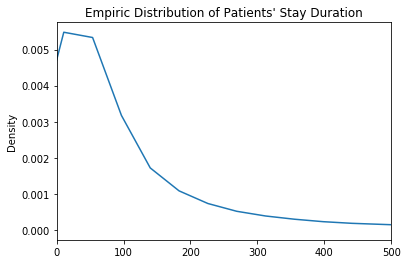

In [16]:
hospitalizations['length'].plot.density(xlim=(0,500), title='Empiric Distribution of Patients\' Stay Duration')

In [17]:
hospitalizations.columns

Index(['admission_id', 'patient_id', 'age', 'gender', 'birth_date',
       'insurance_entity', 'entity_group', 'admission_date', 'admission_time',
       'admission_year', 'admission_month', 'origin', 'admission_physician',
       'admission_sector', 'last_sector', 'last_category', 'isolation',
       'last_room', 'last_bed', 'discharge_date', 'discharge_time',
       'discharge_year', 'discharge_month', 'discharge_reason',
       'pre_discharge_date', 'first_sector', 'administrative_diagnosis',
       'diagnosis_code', 'presumptive_dianogsis', 'discharge_diagnosis_code',
       'discharge_diagnosis', 'date_registered_discharge',
       'time_registered_discharge', 'discharge_physician', 'discharge_summary',
       'discharge_summary_physician', 'surgery', 'express_hip_surgery',
       'admission_lenght_days', 'responsible_sector',
       'second_responsible_sector', 'emergency_admission_datetime',
       'emergency_service', 'has_previous_admission', 'previous_admission_id',
       'p

### 2.2 Main variables description and visualization

For organization purposes, we will divide this section into different groups of variables with similar characteristics:

* `Patients profile`:                                                                                             'age', 'gender', 'insurance_entity', 'entity_group','new_born_weight','new_born_gestation_age',


* `Time features`: 'admission_date', 'admission_time', admission_year', 'admission_month', 'discharge_date', 'discharge_time','discharge_year', 'discharge_month','pre_discharge_date','date_registered_discharge', 'time_registered_discharge','previous_admission_date', 'previous_discharge_date',


* `Diagnosis`:   'administrative_diagnosis','diagnosis_code','presumptive_dianogsis','discharge_diagnosis_code', 'discharge_diagnosis','high_risk_TEP','low_risk_TEP','request_diagnosis'
     


* `Service`: 'second_responsible_sector','emergency_service','has_previous_admission','discharge_ambulance','admission_sector', 'last_sector','isolation', 'surgery', 'express_hip_surgery','discharge_summary','admission_lenght_days','length,'responsible_sector',


* `Origin`: 'request_origin','origin','request_sector'.


* `Physicians`: 'admission_physician','discharge_physician','discharge_summary_physician',

#### 2.2.1 Patients profile

Data regarding patients' characteristics:

'age', 'gender', 'insurance_entity', 'entity_group','new_born_weight','new_born_gestation_age',

`Age`

Represents the patient's age. 

There is a clear relationship between this variable and the hospitalization length which tells us that older people are hospitalized for a longer time (as far as they are not too old in which case hospitalization length starts to decrease probably due to sooner death).

In contrast, it doesn't look like there is significant variation in the no. of admission by age as the following graph illustrates, except by newborns (age=0) whose frequency is significantly larger due to the fact that all babies are born in hospitals and they remain the first hours/days after birth hospitalized with their moms. 


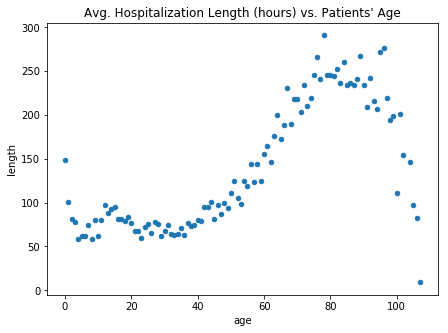

In [18]:
hospitalizations.groupby(['age'], as_index=False).mean().plot.scatter(x='age', y='length', figsize=(7,5), title=
                                                                    'Avg. Hospitalization Length (hours) vs. Patients\' Age' )


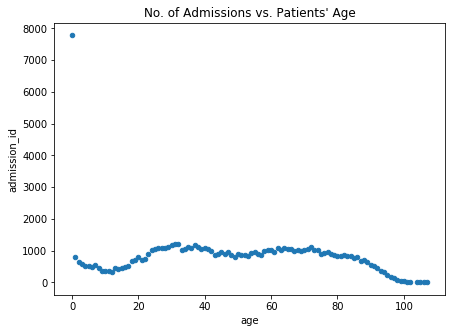

In [19]:
hospitalizations.groupby(['age'], as_index=False).count().plot.scatter(x='age', y='admission_id', figsize=(7,5), title=
                                                                    'No. of Admissions vs. Patients\' Age' )


`Gender`

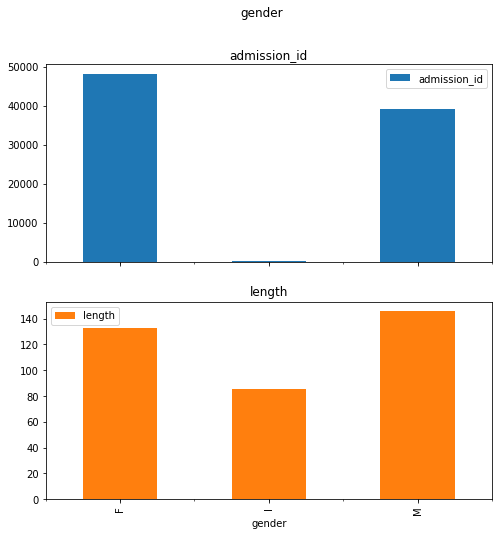

In [21]:
plot_top_categories(hospitalizations, 'gender',3,(8,8),'gender')

`Entity `

Entities represent the different medical coverages the Hospital works with. There are 117 available entities  grouped into 7 types .

No. of admissions differs significantly by entity as well as hospitalization length. 

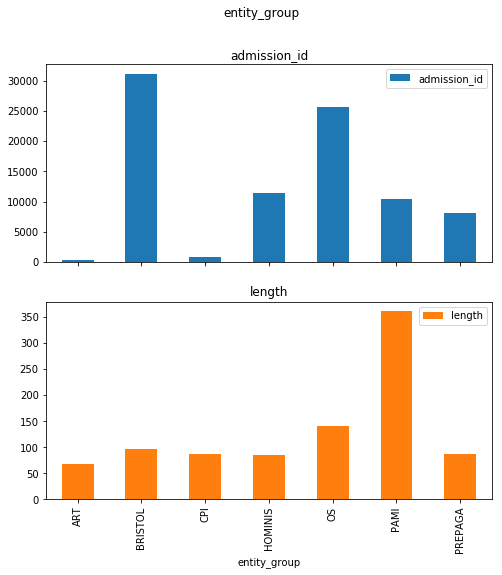

In [23]:
plot_top_categories(hospitalizations, 'entity_group',7,(8,8),'entity_group')

#### 2.2.2 Time features

Time data regarding patient's entry and discharge: 

'admission_date', 'admission_time', admission_year', 'admission_month', 'discharge_date', 'discharge_time','discharge_year', 'discharge_month','pre_discharge_date','date_registered_discharge', 'time_registered_discharge','previous_admission_date', 'previous_discharge_date',

`Hour of the day`

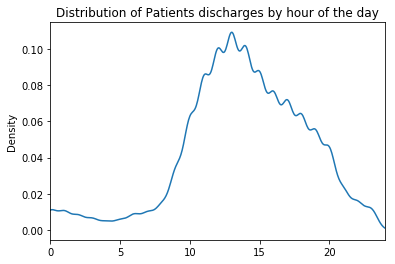

In [24]:
hospitalizations['discharge_datetime'].dt.hour.plot.density(xlim=(0,24), 
                                                        title='Distribution of Patients discharges by hour of the day')

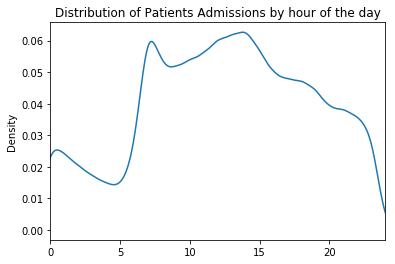

In [25]:
hospitalizations['admission_datetime'].dt.hour.plot.density(xlim=(0,24), 
                                                        title='Distribution of Patients Admissions by hour of the day')

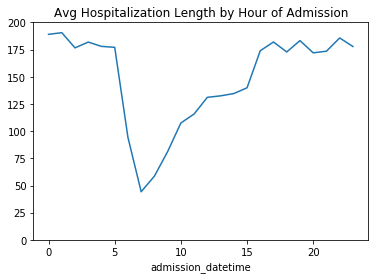

In [27]:
hospitalizations.groupby(
    hospitalizations['admission_datetime'].dt.hour).mean()['length'].plot.line(
    title='Avg Hospitalization Length by Hour of Admission',
    ylim=(0,200))

As expected, there are almost no activity during the night in terms of patients discharges. In particular, after 8 PM the hospitalized patients outflow decreases dramaticaly. Most discharges ocurred betweem 10 AM and 8 PM, with an ascending trend until noon, and a descending trend after it. 

`Day of the week`

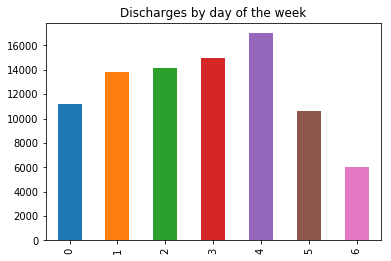

In [29]:
hospitalizations['discharge_datetime'].dt.weekday.value_counts().sort_index().plot.bar(
    title='Discharges by day of the week')

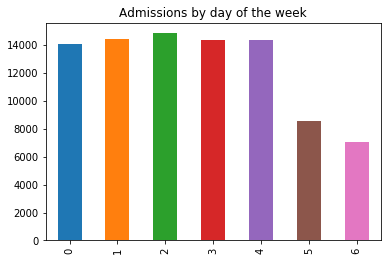

In [30]:
hospitalizations['admission_datetime'].dt.weekday.value_counts().sort_index().plot.bar(
    title='Admissions by day of the week')

Similarly, during the weekends (days 5 & 6) there are signicantly less discharges. Monday is still a day low activity in terms of discharges relative to the average weekday (≈ 12.5 K ). The pick is on Fridays when discharges rose 17 K.

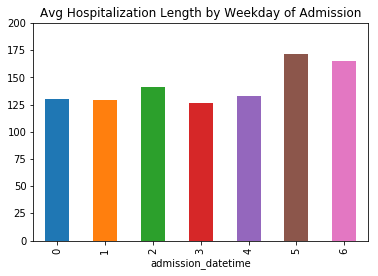

In [31]:
hospitalizations.groupby(
    hospitalizations['admission_datetime'].dt.weekday).mean()['length'].plot.bar(
    title='Avg Hospitalization Length by Weekday of Admission',
    ylim=(0,200))

Patients who are hospitalized during weekends, have a significantly larger stay at the hospital. There are two hypothesis that may explain this pattern:
* on one hand, it may be that treatment of these patients is delayed due to the fact that they are admitted during the weekend, thus several services are not available and they have to wait until the week starts to be treated.
* one the other hand, it may be that patients being admitted on weekends are more mostly urgent cases with more difficult conditions than patients who have a prearranged hospitalization.

`Hospital activity over time`

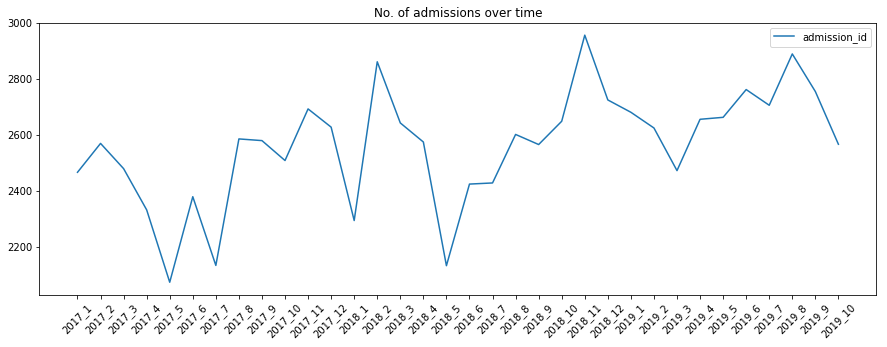

In [32]:
import datetime
hospitalizations['admission_year_month'] = hospitalizations['admission_datetime'].map(lambda x: str(x.year)+'_'+str(x.month))
labels = hospitalizations[hospitalizations['admission_datetime'].dt.date < datetime.date(2019,11,1)]['admission_year_month'].unique()

hospitalizations['discharge_year_month'] = hospitalizations['discharge_datetime'].map(lambda x: str(x.year)+'_'+str(x.month))

labels2 = hospitalizations[hospitalizations['discharge_datetime'].dt.date < datetime.date(2019,11,1)]['discharge_year_month'].unique()

monthly_admissions = hospitalizations[hospitalizations['admission_datetime'].dt.date < datetime.date(2019,11,1)].groupby(
    by= 'admission_year_month',
    as_index=False)['admission_id'].count()

ax = monthly_admissions.plot.line(
                            title='No. of admissions over time',
                            legend=True,
                            figsize=(15,5),
                            xticks=monthly_admissions.index).set_xticklabels(labels,rotation=45)

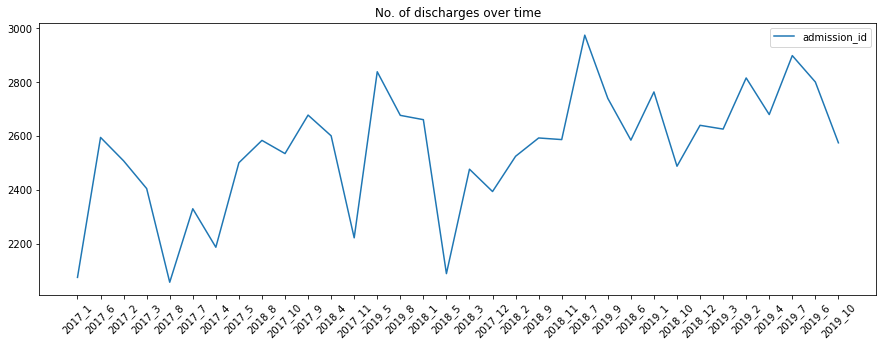

In [33]:
monthly_discharges = hospitalizations[hospitalizations['discharge_datetime'].dt.date < datetime.date(2019,11,1)].groupby(
    by= 'discharge_year_month',
    as_index=False)['admission_id'].count()
ax2 = monthly_discharges.plot.line(title='No. of discharges over time',
                            legend=True,
                            figsize=(15,5),
                            xticks=monthly_discharges.index).set_xticklabels(labels2,rotation=45)

There is a slightly increasing trend in number of daily admissions over time

This trend is accompanied by a similarly increasing trend in daily number of discharges over time. So as a whole we can say that the hospital is having a higher patients turnover over time. 

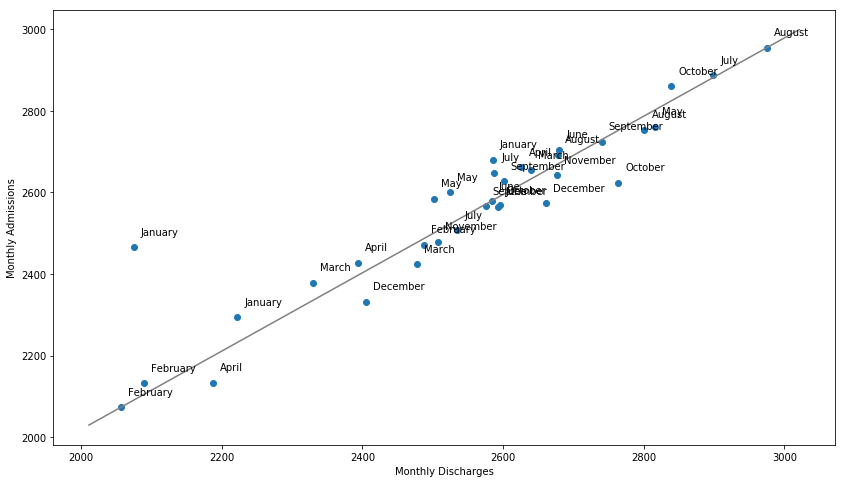

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import calendar

f, ax = plt.subplots(figsize=(14, 8))

tmp = pd.merge(monthly_discharges,monthly_admissions, 
         how='inner',
         left_on='discharge_year_month', 
         right_on = 'admission_year_month')


x = tmp['admission_id_x']
y = tmp['admission_id_y']

ax.scatter(x,y)
labels = [calendar.month_name[int(label[5:])] for label in list(tmp.discharge_year_month)]

ax.set_ylabel('Monthly Admissions')
ax.set_xlabel('Monthly Discharges')

for i, label in enumerate(labels):
    ax.annotate(label, (x[i]+10, y[i]+30))


ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c=".5")
plt.show()

#### 2.2.3 Diagnosis

Data related to the patient's diagnosis over his hospitalization:

'administrative_diagnosis','diagnosis_code','presumptive_dianogsis','discharge_diagnosis_code', 'discharge_diagnosis','high_risk_TEP','low_risk_TEP','request_diagnosis'

`request_diagnosis`

This variable represents .....

Diagnosis in this variable is not codified, the variable has more than 8 K categories. 

The top 50 categories in terms of admissions have been plot below

In [57]:
len(hospitalizations['request_diagnosis'].unique())

7952

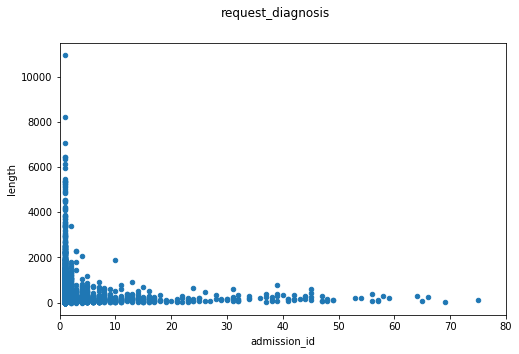

In [98]:
plot_scatter_length_vs_count(hospitalizations,'request_diagnosis',xlim=(0,50),ylim=(0,6000))

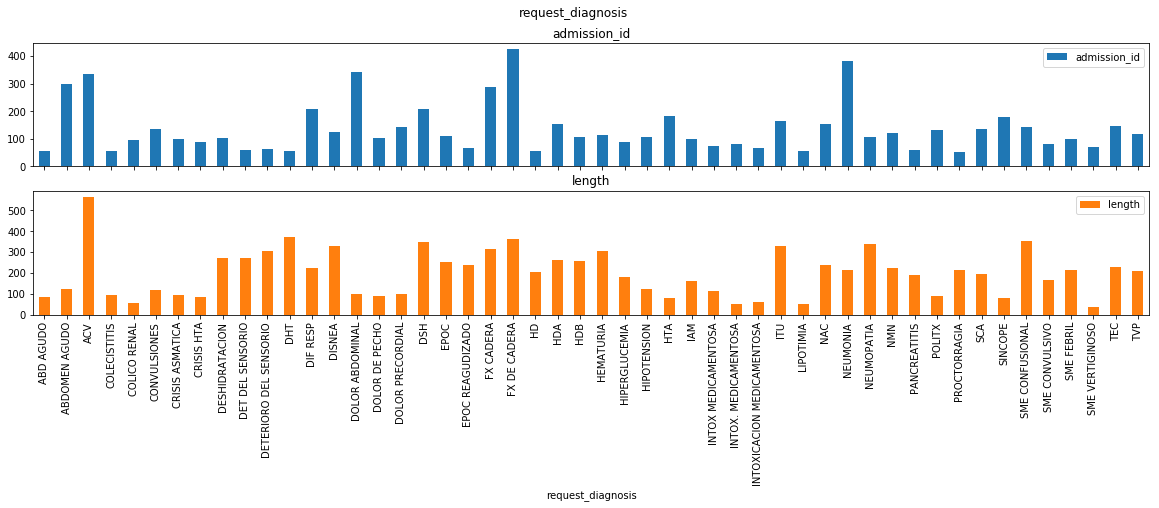

In [58]:
plot_top_categories(hospitalizations,'request_diagnosis',50,(20,5), 
                          'request_diagnosis')

`discharge_diagnosis`

This variable represents .....

Diagnosis in this variable is not codified either, the variable has almost 6 K categories.

The top 50 categories in terms of admissions have been plot below.

In [59]:
len(hospitalizations['discharge_diagnosis'].unique())

5793

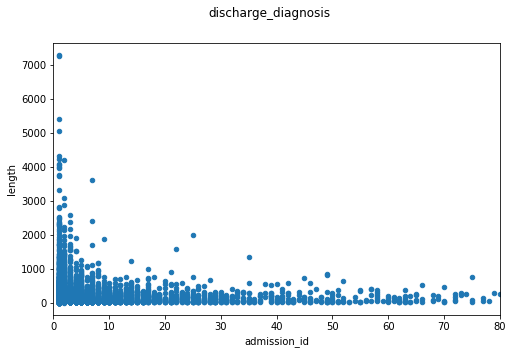

In [99]:
plot_scatter_length_vs_count(hospitalizations,'discharge_diagnosis')

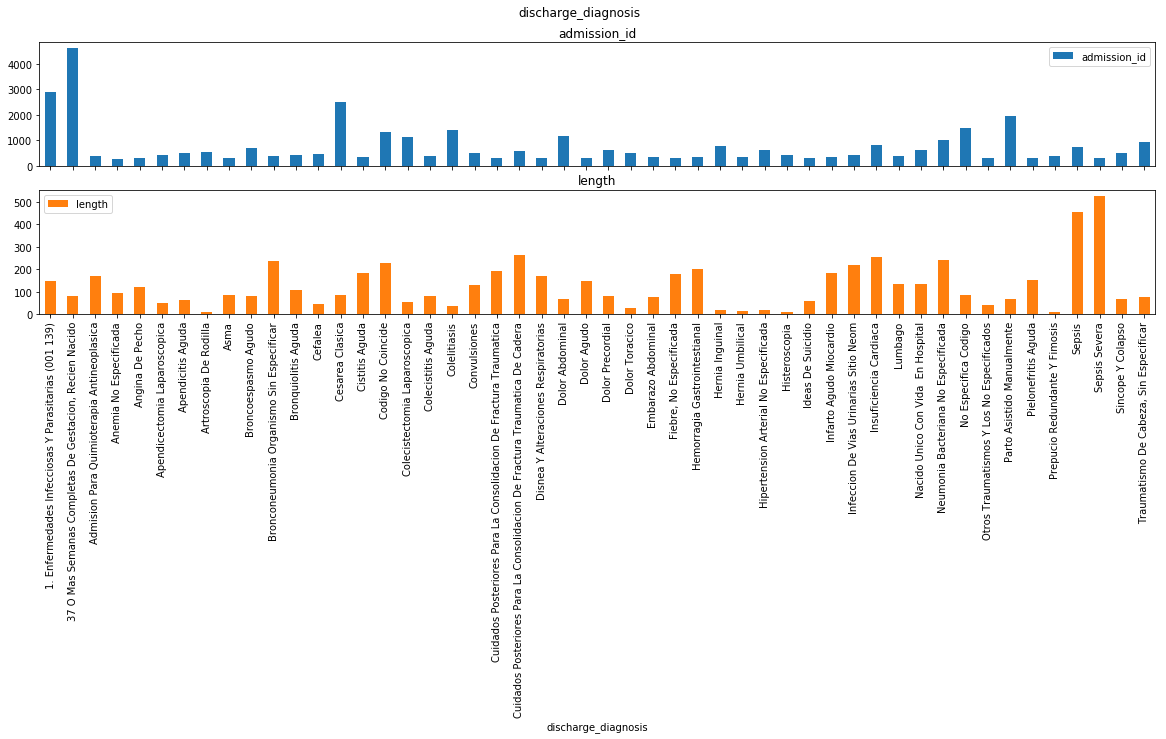

In [61]:
plot_top_categories(hospitalizations,'discharge_diagnosis',50,(20,5), 
                          'discharge_diagnosis')

In [62]:
len(hospitalizations['administrative_diagnosis'].unique())

20790

To extract information from uncodified diagnosis data remains quite difficult as was seen above. There are thousands of categories and they do not follow a certain structure, suggesting some aditional techniques as text mining should be necesary to be able to take advantage of this features.

#### 2.2.4 Service


Variables related to the characteristics of the services/treatments received by the patient during his hospitalizacion:

'second_responsible_sector','emergency_service','has_previous_admission','discharge_ambulance','admission_sector', 'last_sector','isolation', 'surgery', 'express_hip_surgery','discharge_summary','admission_lenght_days','length,'responsible_sector',

`surgery`

Indicates whether the patient in consideration underwent a surgery during the hospitalization or not. False is the mode meaning that most patients hospitelized are not surgically intervened,however the distribution is more or less balanced. Hospitalization duration tends to be larger for patients who have been subjected to a surgery.

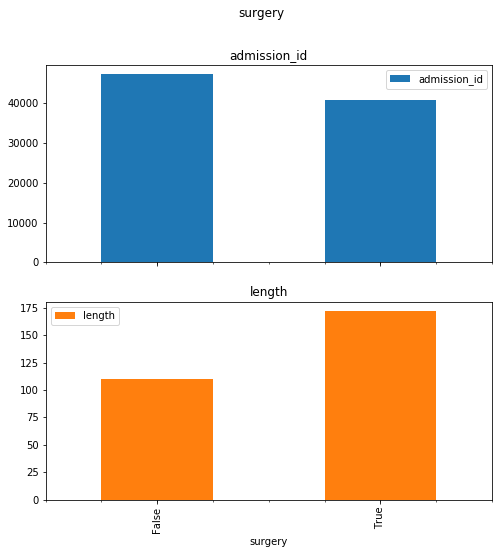

In [63]:
plot_top_categories(hospitalizations,'surgery',2,(8,8),'surgery')

`responsible_sector`

Indicates the hospital sector in charge of the patient hospitalization. There are 62 possible values for this variable.

In [64]:
hospitalizations['responsible_sector'].value_counts()

CLINICA MEDICA                             21587
CIRUGIA GENERAL ADULTOS                     7661
OBSTETRICIA                                 7256
ORTOPEDIA Y TRAUMATOLOGIA                   6930
NEONATOLOGIA                                3873
GINECOLOGIA                                 2834
UROLOGIA                                    2004
CARDIOLOGIA ADULTOS                         1826
PEDIATRIA                                   1148
OTORRINOLARINGOLOGIA                        1092
CIRUGIA HIGADO VIAS BILIARES Y PANCREAS      914
CIRUGIA DE PAREDES ABDOMINALES               649
CIRUGIA PLASTICA Y REPARADORA                520
CIRUGIA DE COLON, RECTO Y ANO                492
UNIDAD CORONARIA                             372
GASTROENTEROLOGIA Y HEPATOLOGIA ADULTOS      367
UNIDAD DE CUIDADOS INTENSIVOS                317
HEMOTERAPIA                                  299
NEUROCIRUGIA                                 268
HEMATOLOGIA                                  261
CIRUGIA TORACICA    

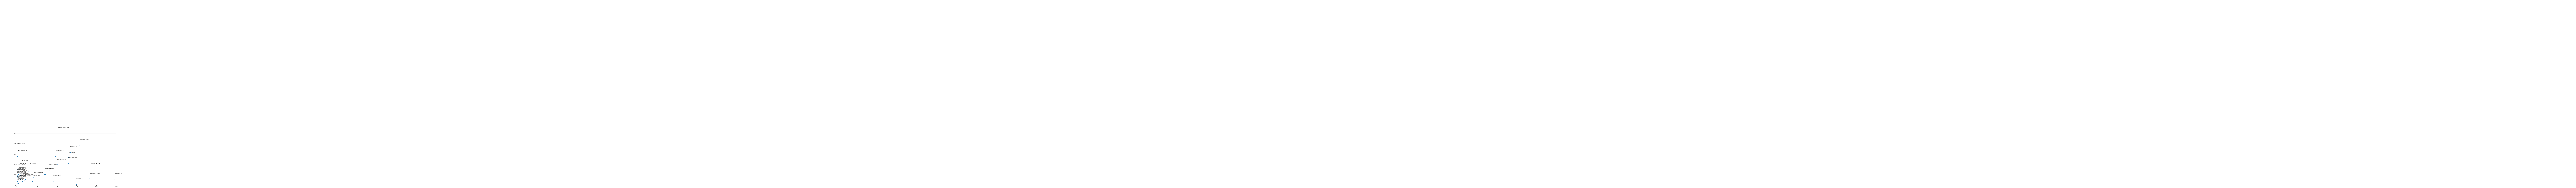

In [178]:
plot_scatter_length_vs_count(hospitalizations,'responsible_sector',labeled=True) 

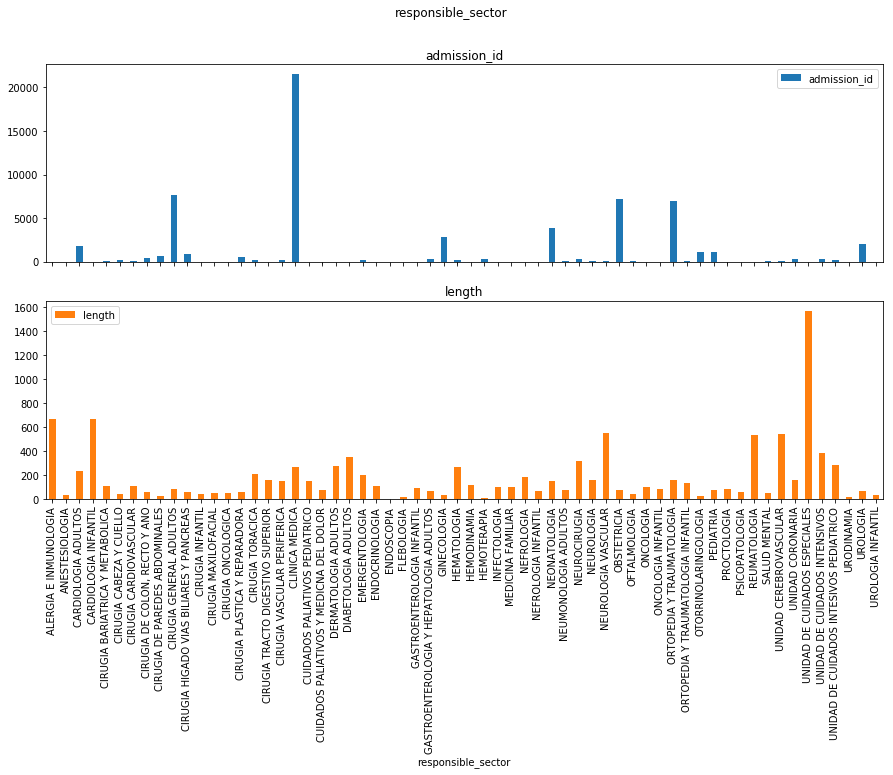

In [65]:
plot_top_categories(hospitalizations, 'responsible_sector',62,(15,8),'responsible_sector')

`express_hip_surgery`

This variable reflect whether or not the patient has received a hip express surgery. Most patients hospitalized haven't. However having received this type or surgery seems like a good predictor of a longer stay at the hospital.

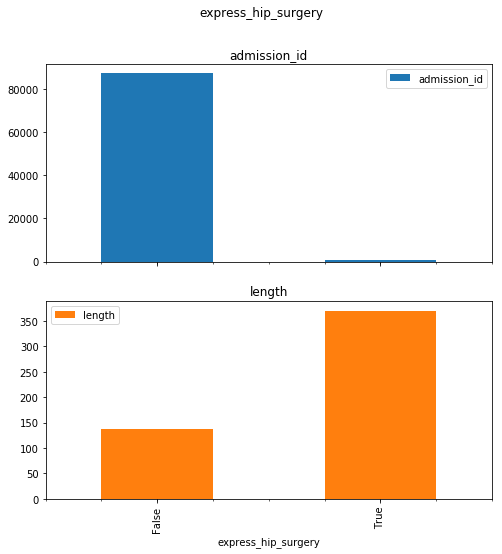

In [67]:
plot_top_categories(hospitalizations, 'express_hip_surgery',2,(8,8),'express_hip_surgery')

#### 2.2.5 Origin

Variables related to where does the patient hospitalization comes from:

'request_origin','origin','request_sector'.

`origin`

Indicates the source of the patient hospitalized.
There are five possibles origins: 
* AMB Urgente: patients coming from ....
* Derivacion: patients that were derived to be hospitalized either from other medical center or some of the hospital areas.
* Emergencias: patients coming from emergency services.
* Guardia: patients that came to the medical guard service and were hospitalized
* Programada: these are scheduled hospitalizations. 

No. of admissions and hospitalization duration vary significantly within the different sources.

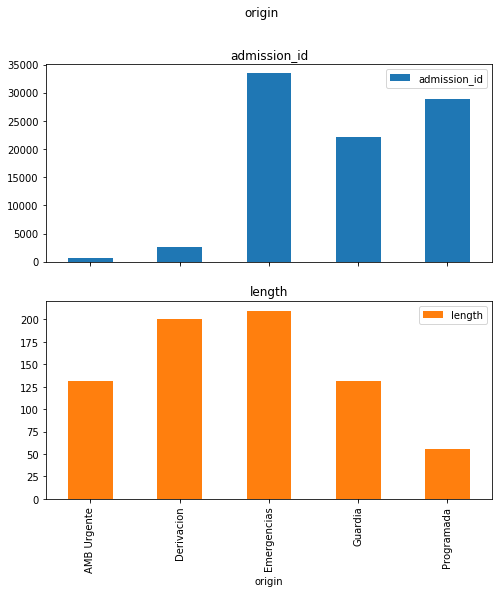

In [68]:
plot_top_categories(hospitalizations, 'origin',5,(8,8),'origin')

`request_origin`

The variable 'request_origin' represents ......

This variable is not encoded and contains more than 3K categories, most of them corresponding to physicist names. Top 50 categories are plotted below

In [70]:
len(hospitalizations['request_origin'].unique())

3292

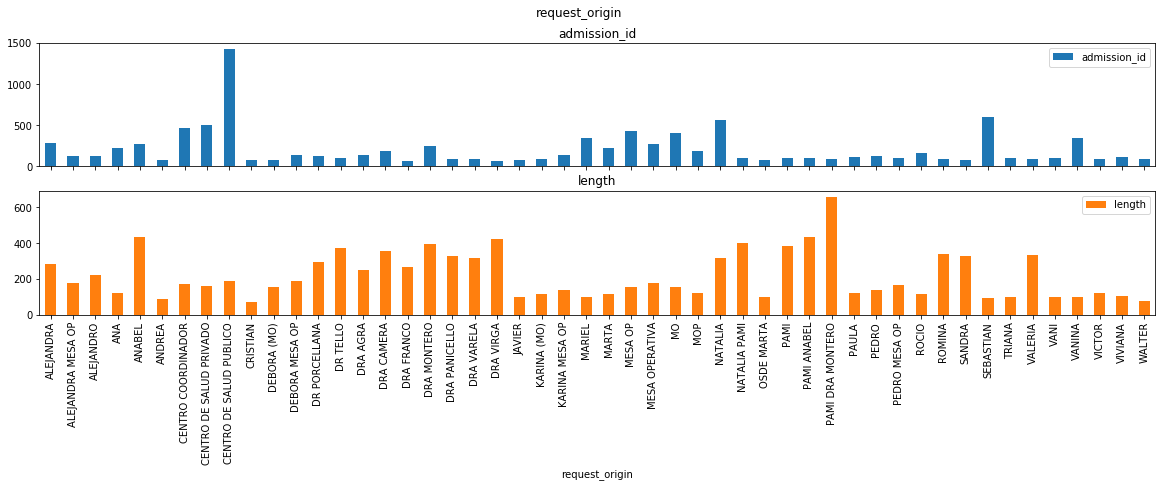

In [71]:
plot_top_categories(hospitalizations,'request_origin',50,(20,5), 'request_origin' )

`request_sector`

Represent which sector of the hospital has indicated the patient's hospitalization. There are 9 available values for this variable.
Most hospitalizations come from the category `INTERNACION GENERAL`. There is great variation in hospitalization duration between different values of this variable

In [179]:
len(hospitalizations['request_sector'].unique())

9

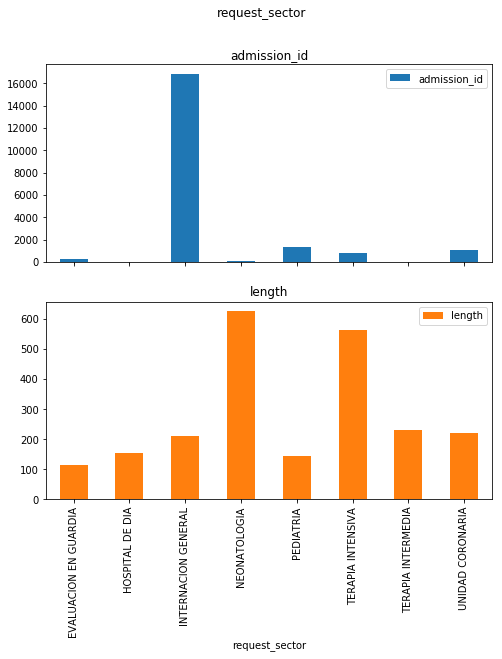

In [180]:
plot_top_categories(hospitalizations, 'request_sector',8,(8,8),'request_sector')

#### 2.2.6 Physicians

Info about the hospital professional that were in charge of the patient during his hospitalization:

'admission_physician','discharge_physician','discharge_summary_physician',

Besides including these categorical variables as they are (which may or may not make sense), we may build physicians embeddings,representing each physician characteritics by crossing this data with the physicians dataset provided by the Hospital management team (with data regarding, for example, the professional specialization, his age, etc) and the historic performance of each physician (like the avg. hospitalization duration of his past patients).

`admission_physician `

In [184]:
hospitalizations['admission_physician'].nunique()

1684

In [186]:
hospitalizations['admission_physician'].value_counts()[:100]

LIBRE ELECCION                        11246
ORTIZ RODRIGUEZ ANA MARIA              1147
MEDICO DE GUARDIA                      1128
ABAD MANUEL                            1126
SALAZAR ALVAREZ  FERNANDO XAVIER        971
PFAFFEN GUILLERMO EDUARDO               910
ACOSTA FILIPPI FRANCISCO JESÚS          836
ORTIZ NATALIA VERONICA                  643
DISANTTO MARIA CARLA                    638
CANIS DIEGO DAMIAN                      629
BETTINOTTI MARCELO                      622
RUIZ MARIA CECILIA                      603
ROASIO ALICIA NOEMI                     593
RAIMONDI SEBASTIAN                      590
CASTRO CASTRO BORIS RAFAEL              582
REYNAUD GERARDO                         547
MONTAGNA FABIAN                         541
ROJAS MARIANA GISELLE                   522
ORTIZ NICOLAS MARTIN                    508
MEDICO DE INTERNACION                   503
ABADIA MICAELA                          487
FARFAN GUILLEN RODRIGO DANIEL           478
IGLESIAS MARIANO                

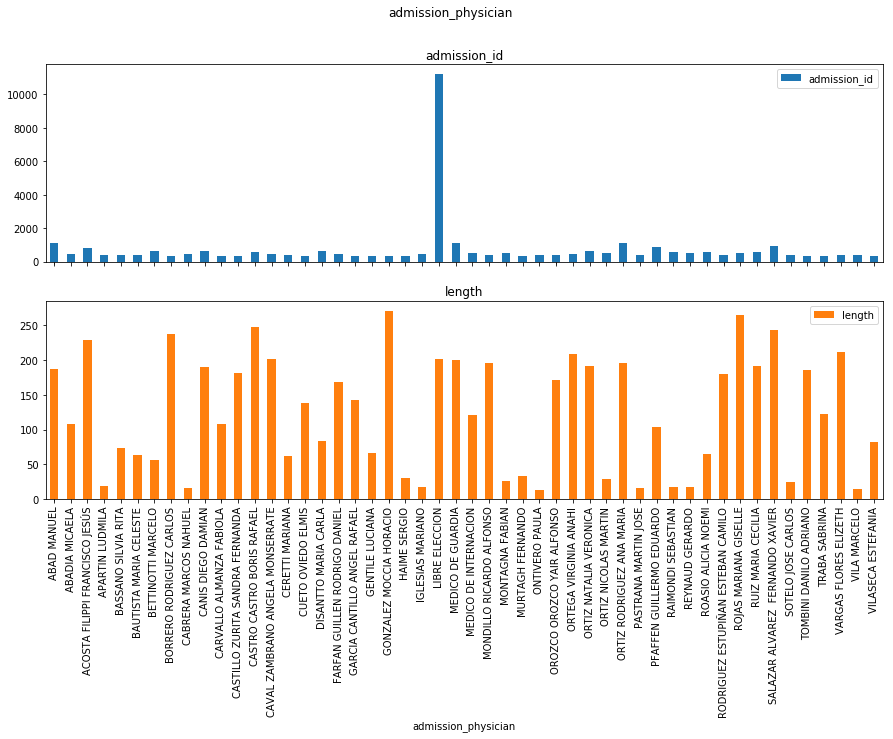

In [187]:
plot_top_categories(hospitalizations, 'admission_physician',50,(15,8),'admission_physician')

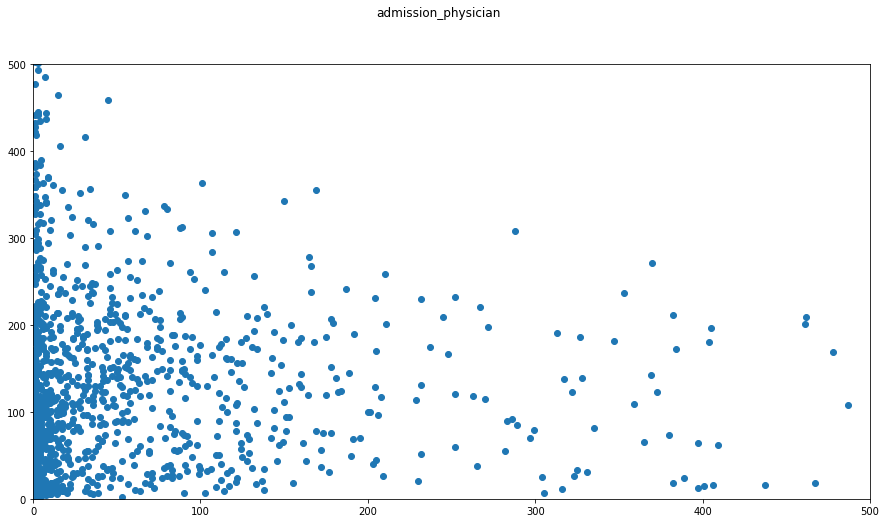

In [191]:
plot_scatter_length_vs_count(hospitalizations,
                                 dimension='admission_physician')

`Médico Denuncia Egreso`

In [155]:
len(internaciones['Médico Denuncia Egreso'].value_counts())

811

plot_top_categories(internaciones, 'Médico Denuncia Egreso',50,(15,8),'Médico Denuncia Egreso')

`Médico Epicrisis`

In [156]:
len(internaciones['MédicoEpicrisis'].value_counts())

766

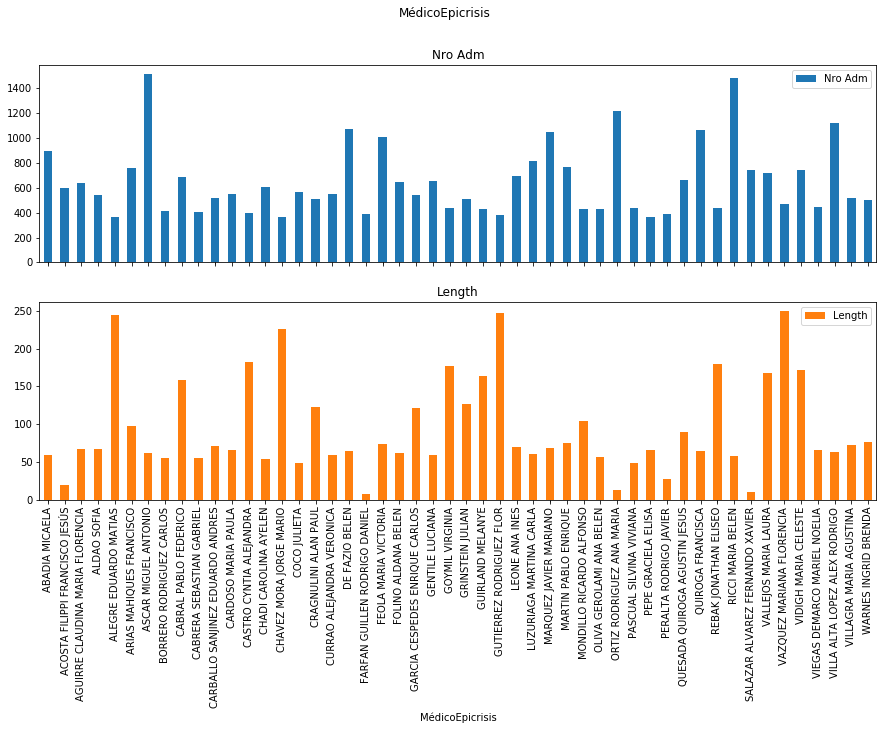

In [167]:
plot_top_categories(internaciones, 'MédicoEpicrisis',50,(15,8),'MédicoEpicrisis')

## 3) Images df

This dataset contains information regarding the images analysis requested by physicians for the hospital's patients.

Each image study is linked to a clinic history id and a date. These two variables will let us cross images data with the hospitalizations data in order to know what kind of studies were required and when during the patient hospitalization. 

##### Sample view of the 'images' df

In [173]:
images = db['images']
images.head()

,Nro Vale,Pun,Estado,Fecha,Hora,HH,AñoMes,Sector,Nro Adm,HistClín,Fec.Adm.,Fec.Alta,Entidad,Nombre Entidad,GrupoEnt,Urgencia,Mnemo Serv,Servicio,Cod Serv,Nombre del Solicitante,Función del Solicitante,Prestación,Descrip Prestación,CantPrest,Cod Insumo,Descrip Insumo,CantInsumos,Observ.Estudio
0,35455089,35454865,3,2017-01-01,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,PAMI,1,RX,RAYOS,7100,VEDIA ANICETA,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN
1,35455101,35454877,3,2017-01-01,03:34:00,3,2017-Ene,EME,466470-1,3526141-4,2017-01-01,2017-01-04,876,PAMI UGL VI,PAMI,1,RX,RAYOS,7100,VEDIA ANICETA,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN
2,35455130,35454906,3,2017-01-01,04:26:00,4,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,PAMI,0,RX,RAYOS,7100,DENNER GERMAN,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN
3,35455135,35454911,3,2017-01-01,04:31:00,4,2017-Ene,EME,466473-0,3672378-8,2017-01-01,2017-01-04,948,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,1,RX,RAYOS,7100,CANIS DIEGO,MEDICO DE UCI,34042103,"ABDOMEN FRENTE, DE PIE Y ACOSTADO. RX DE",1,NaN,NaN,NaN,NaN
4,35455135,35454911,3,2017-01-01,04:31:00,4,2017-Ene,EME,466473-0,3672378-8,2017-01-01,2017-01-04,948,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,1,RX,RAYOS,7100,CANIS DIEGO,MEDICO DE UCI,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN


##### Available variables


In [169]:
for i in images.columns:
    print(i)

Nro Vale
Pun
Estado
Fecha
Hora
HH
AñoMes
Sector
Nro Adm
HistClín
Fec.Adm.
Fec.Alta
Entidad
Nombre Entidad
GrupoEnt
Urgencia
Mnemo Serv
Servicio
Cod Serv
Nombre del Solicitante
Función del Solicitante
Prestación
Descrip Prestación
CantPrest
Cod Insumo
Descrip Insumo
CantInsumos
Observ.Estudio


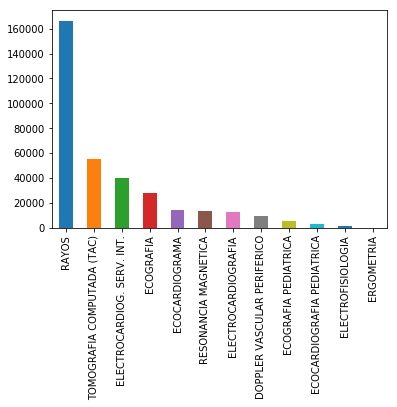

In [269]:
images.Servicio.value_counts().plot.bar()

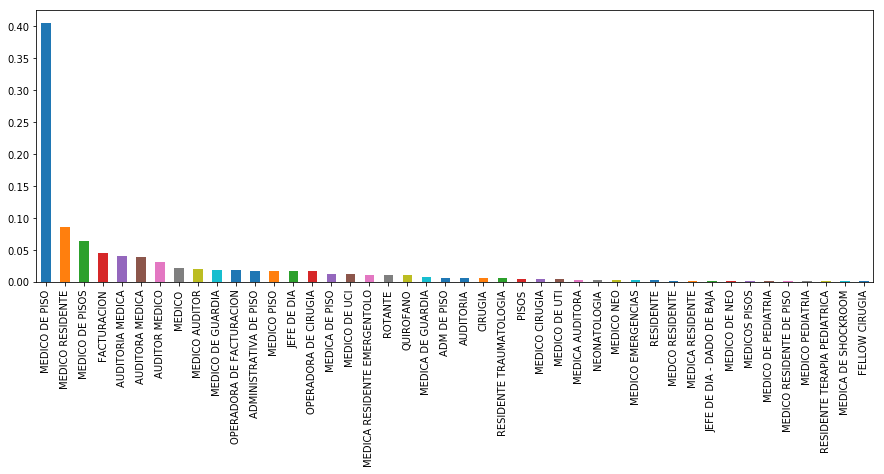

In [285]:
images['Función del Solicitante'].value_counts(True)[:-80].plot.bar(figsize=(15,5))

In [287]:
images['Estado'].value_counts()

3     327655
2      22745
11         3
Name: Estado, dtype: int64

In [179]:
import numpy as np

##### Average no. of images studies per hospitalization

In [190]:
np.mean(images.groupby(by='Nro Adm')['Nro Adm'].count())

6.672690571858397

In [191]:
np.mean(images.groupby(by='HistClín')['HistClín'].count())

8.88625989044431

In [ ]:
np.mean(images.groupby(by='HistClín')['Nro Adm'].count())

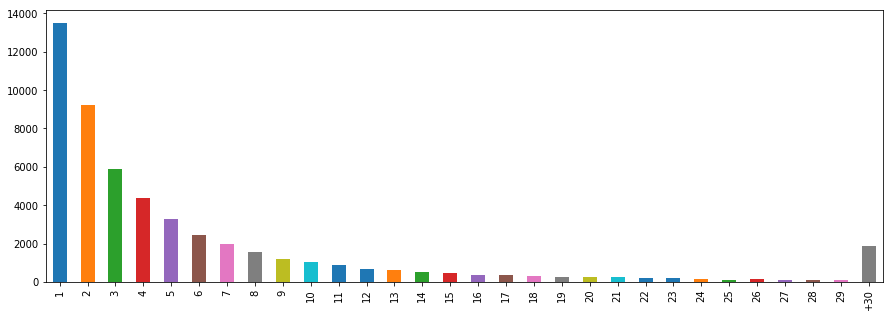

In [258]:
images.groupby(by='Nro Adm').count()['Fec.Adm.'].apply(lambda x: '+30' if x >= 30 else x).value_counts(sort=False).plot.bar(figsize=(15,5))

#Disclaimer: this graph does not consider patients who have 0 images requested.

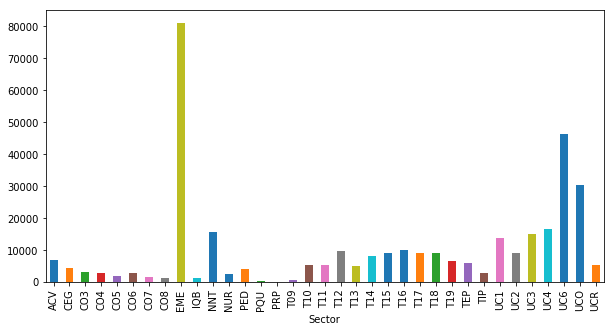

In [265]:
images.groupby(by='Sector').count()['Fec.Adm.'].plot.bar(figsize=(10,5))

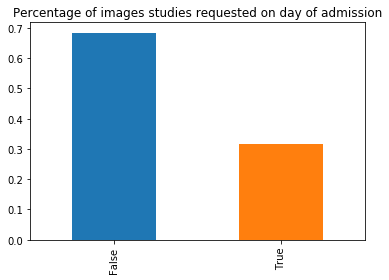

In [297]:
(images['Fecha'] == images['Fec.Adm.']).value_counts(True).plot.bar(title='Percentage of images studies requested on day of admission')

In [367]:
images ['Lag_admission_image_request'] = (pd.to_datetime(images['Fecha'])-pd.to_datetime(images['Fec.Adm.'])).dt.days

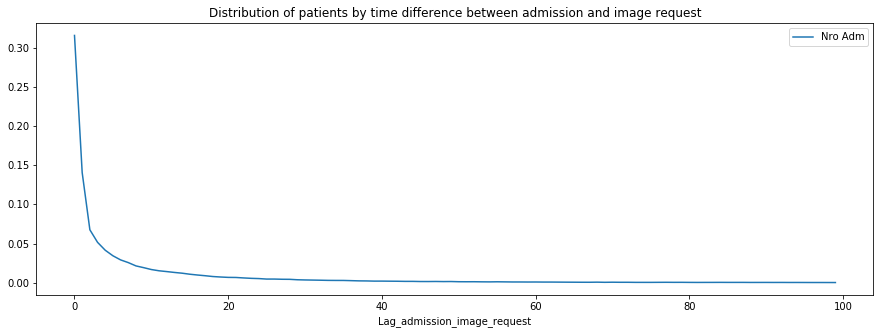

In [375]:
(images.groupby('Lag_admission_image_request').agg({'Nro Adm': 'count'})/len(images)).head(100).plot(figsize=(15,5),
                                title = 'Distribution of patients by time difference between admission and image request')

## 4) Laboratory analysis df 

In [376]:
labos = db['labos']
labos.head()

,Nro Vale,Pun,Estado,Fecha,Hora,HH,AñoMes,Sector,Nro Adm,HistClín,Nombre Paciente,Fec.Adm.,Fec.Alta,Entidad,Nombre Entidad,Nro.Afiliado,GrupoEnt,Urgencia,Mnemo Serv,Servicio,Cod Serv,Nombre del Solicitante,Función del Solicitante,Prestación,Descrip Prestación,CantPrest,Cod Insumo,Descrip Insumo,CantInsumos,EstadoResultado,Observ.Estudio
0,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,171,COAGULOGRAMA BASICO,1,NaN,NaN,NaN,NaN,NaN
1,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,190,CPK,1,NaN,NaN,NaN,NaN,NaN
2,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,412,GLUCOSA EN SANGRE,1,NaN,NaN,NaN,NaN,NaN
3,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,475,HEMOGRAMA,1,NaN,NaN,NaN,NaN,NaN
4,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,481,HEPATOGRAMA,1,NaN,NaN,NaN,NaN,NaN


In [172]:
for i in labos.columns:
    print(i)

Nro Vale
Pun
Estado
Fecha
Hora
HH
AñoMes
Sector
Nro Adm
HistClín
Nombre Paciente
Fec.Adm.
Fec.Alta
Entidad
Nombre Entidad
Nro.Afiliado
GrupoEnt
Urgencia
Mnemo Serv
Servicio
Cod Serv
Nombre del Solicitante
Función del Solicitante
Prestación
Descrip Prestación
CantPrest
Cod Insumo
Descrip Insumo
CantInsumos
EstadoResultado
Observ.Estudio


In [380]:
len(labos['Descrip Prestación'].value_counts())

691

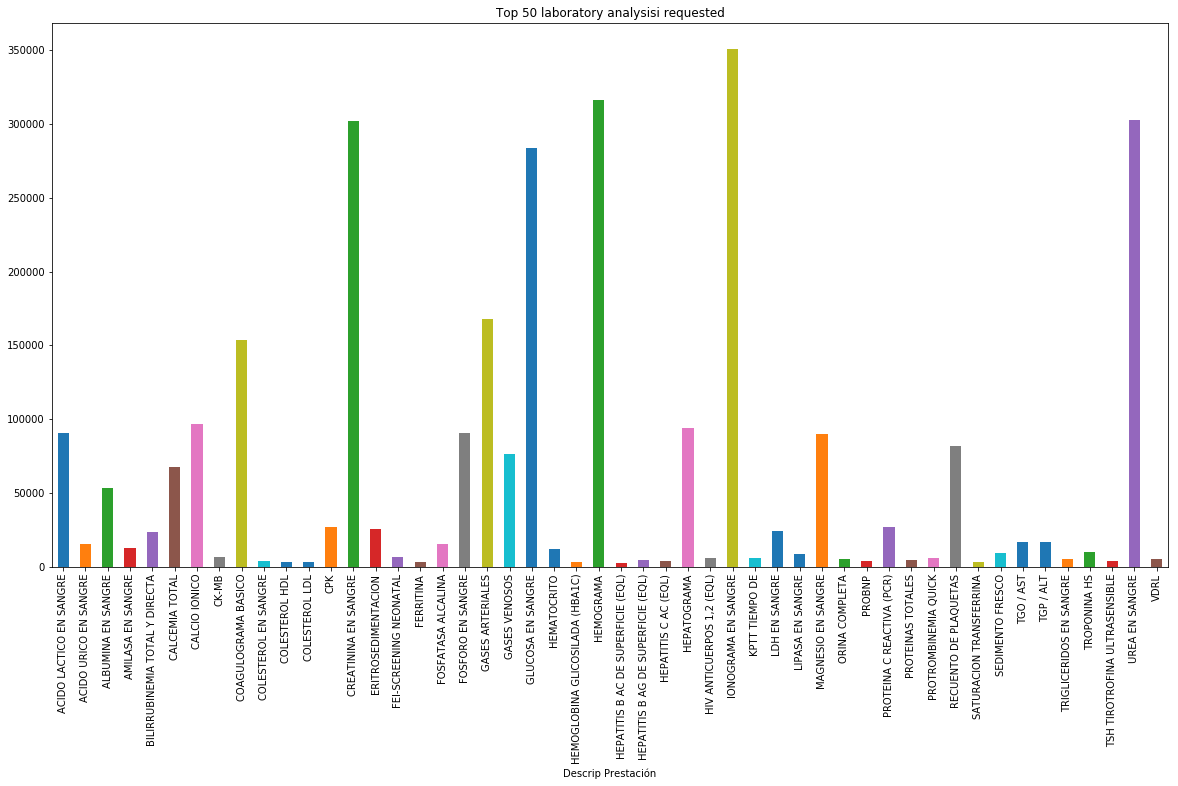

In [384]:
plot_top_categories_count(labos,'Descrip Prestación',50,figsize=(20,10), title='Top 50 laboratory analysisi requested')

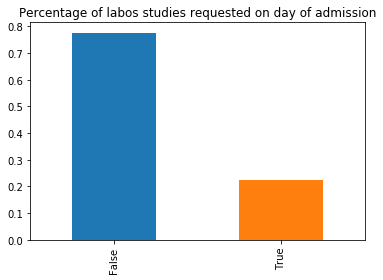

In [377]:
(labos['Fecha'] == labos['Fec.Adm.']).value_counts(True).plot.bar(title='Percentage of labos studies requested on day of admission')



In contrast with images, laboratory analysis are not usually requested during the first day of admission.

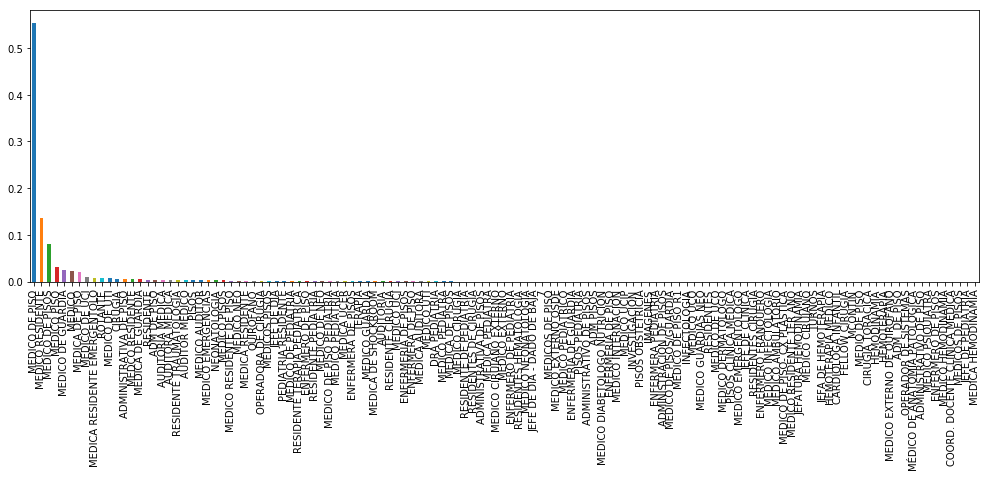

In [388]:
labos['Función del Solicitante'].value_counts(True).plot.bar(figsize=(17,5))

In [391]:
np.mean(labos.groupby(by='Nro Adm')['Nro Adm'].count())

47.3783717395643

In [390]:
np.mean(labos.groupby(by='HistClín')['HistClín'].count())

63.51798872103075